In [1]:
import numpy as np
import cv2

import PIL.Image as Image
#import os

import matplotlib.pylab as plt

#import tensorflow as tf
#import tensorflow_hub as tensorflow_hub

from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow.keras.models import Sequential

import pathlib
import dlib

from sklearn.metrics import euclidean_distances
from tensorflow.keras.optimizers import Adam

In [2]:
predictor = dlib.shape_predictor('../input/shapepredictor/data/shape_predictor_68_face_landmarks.dat')

In [3]:
non_drowsy_dataset_dir = "../input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy"
drowsy_dataset_dir = "../input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Drowsy"


non_drowsy_dataset_dir = pathlib.Path(non_drowsy_dataset_dir)
print(non_drowsy_dataset_dir)
drowsy_dataset_dir = pathlib.Path(drowsy_dataset_dir)
print(drowsy_dataset_dir)

../input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy
../input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Drowsy


In [4]:
list(non_drowsy_dataset_dir.glob('*'))[:5]

[PosixPath('../input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy/e0604.png'),
 PosixPath('../input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0868.png'),
 PosixPath('../input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy/a1012.png'),
 PosixPath('../input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy/c0445.png'),
 PosixPath('../input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy/u0030.png')]

In [5]:
image_count = len(list(non_drowsy_dataset_dir.glob('*')))
image_count

19445

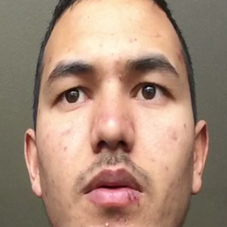

In [6]:
nonDrowsy = list(non_drowsy_dataset_dir.glob("*"))
Image.open(str(nonDrowsy[5])) 

In [7]:
image_dict = {
    'non_drowsy': list(non_drowsy_dataset_dir.glob('*')),
    'drowsy' : list(drowsy_dataset_dir.glob('*')),
}

In [8]:
labels_dict = {
    'non_drowsy': 0,
    'drowsy' : 1,
}

labels_class = ['non_drowsy','drowsy']

In [9]:
X = []
y = []

for label, images in image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    height, width, channels = img.shape
    
    shape = predictor(gray, dlib.rectangle(0,0,width,height))
    
#     shape_np = np.zeros((12, 2), dtype="int")
#     j = 0
#     for i in range(36, 48):
#         shape_np[j] = (shape.part(i).x, shape.part(i).y)
#         j = j + 1
#     shape = shape_np

#     eucl_dist_left = euclidean_distances(shape[0:6], shape[0:6])
#     eucl_dist_right = euclidean_distances(shape[6:12], shape[6:12])
#     eucl_dist_left = np.array(eucl_dist_left)
#     eucl_dist_right = np.array(eucl_dist_right)

    shape_np = np.zeros((68, 2), dtype="int")

    for i in range(0, 68):
        shape_np[i] = (shape.part(i).x, shape.part(i).y)
    shape = shape_np

    eucl_dist = euclidean_distances(shape, shape)

    X.append(eucl_dist)
    y.append(labels_dict[label])

In [10]:
X = np.array(X)
y = np.array(y)

In [11]:
X.shape
#y.shape

(41793, 68, 68)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
X_train.shape

(31344, 68, 68)

In [14]:
X_train[0]

array([[  0.        ,  23.19482701,  47.09564736, ..., 144.61673485,
        139.8177385 , 133.95894894],
       [ 23.19482701,   0.        ,  24.        , ..., 128.76334882,
        122.9186723 , 116.40017182],
       [ 47.09564736,  24.        ,   0.        , ..., 112.44554237,
        105.47511555,  98.2903861 ],
       ...,
       [144.61673485, 128.76334882, 112.44554237, ...,   0.        ,
         10.04987562,  18.02775638],
       [139.8177385 , 122.9186723 , 105.47511555, ...,  10.04987562,
          0.        ,   8.24621125],
       [133.95894894, 116.40017182,  98.2903861 , ...,  18.02775638,
          8.24621125,   0.        ]])

In [15]:
import tensorflow as tf
X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)

2022-06-30 06:31:10.754943: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-30 06:31:10.796635: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-30 06:31:10.797677: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-30 06:31:10.806607: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [16]:
model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(68, 68)),  # input layer (1)
#     keras.layers.Dense(512, activation='sigmoid'),  # hidden layer (2)
#     keras.layers.Dense(512, activation='sigmoid'),  # hidden layer (3)
#     keras.layers.Dense(512, activation='sigmoid'),  # hidden layer (4)
#     keras.layers.Dense(512, activation='sigmoid'),  # hidden layer (5)
#     keras.layers.Dense(6, activation='softmax') # output layer (6)
    
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(68,68,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),


    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(68,68,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    
    
#     keras.layers.Conv2D(filters=32,kernel_size=(1,1),activation='relu',input_shape=(12,6,1)),
#     keras.layers.MaxPooling2D((2,2)),
#     keras.layers.Dropout(0.25),

#     keras.layers.Conv2D(filters=64,kernel_size=(1,1),activation='relu',input_shape=(12,6,1)),
#     keras.layers.MaxPooling2D((2,2)),
#     keras.layers.Dropout(0.25),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(2,activation='softmax')
])

In [17]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 66, 66, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 33, 33, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

In [18]:
history = model.fit(X_train,y_train,epochs = 100 , validation_data = (X_test, y_test))

2022-06-30 06:31:15.257321: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1159477248 exceeds 10% of free system memory.
2022-06-30 06:31:16.121656: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-06-30 06:31:17.435268: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


980/980 [==============================] - ETA: 0s - loss: 0.7971 - accuracy: 0.5062

2022-06-30 06:31:28.458537: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 386529408 exceeds 10% of free system memory.


980/980 [==============================] - 14s 6ms/step - loss: 0.7971 - accuracy: 0.5062 - val_loss: 0.6907 - val_accuracy: 0.4692
Epoch 2/100
980/980 [==============================] - 6s 6ms/step - loss: 0.6975 - accuracy: 0.5418 - val_loss: 0.6746 - val_accuracy: 0.6231
Epoch 3/100
980/980 [==============================] - 5s 6ms/step - loss: 0.6640 - accuracy: 0.5934 - val_loss: 0.6568 - val_accuracy: 0.6345
Epoch 4/100
980/980 [==============================] - 6s 6ms/step - loss: 0.6382 - accuracy: 0.6220 - val_loss: 0.6740 - val_accuracy: 0.5544
Epoch 5/100
980/980 [==============================] - 5s 6ms/step - loss: 0.6140 - accuracy: 0.6505 - val_loss: 0.6926 - val_accuracy: 0.4731
Epoch 6/100
980/980 [==============================] - 6s 6ms/step - loss: 0.5760 - accuracy: 0.6875 - val_loss: 0.6343 - val_accuracy: 0.5969
Epoch 7/100
980/980 [==============================] - 5s 6ms/step - loss: 0.5313 - accuracy: 0.7289 - val_loss: 0.5250 - val_accuracy: 0.7415
Epoch 8/10

In [19]:
model.save('model_landmark.h5')

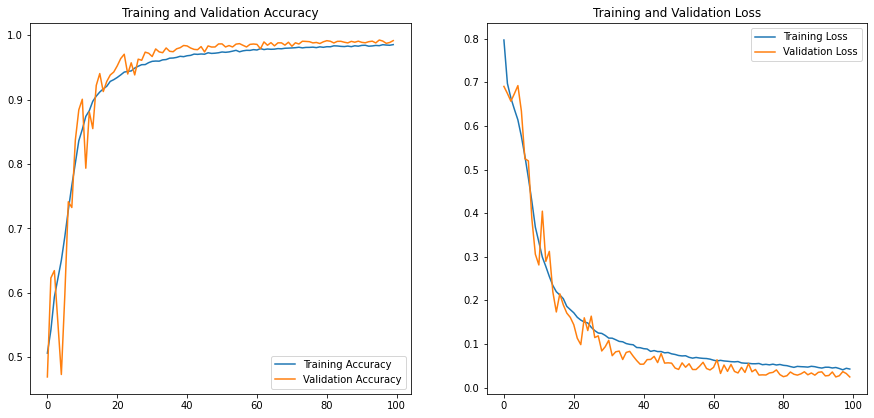

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()